### 问题三：

建立辛烷值（RON）损失预测模型：采用上述样本和建模主要变量，通过数据挖掘技术建立辛烷值（RON）损失预测模型，并进行模型验证。

In [3]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression  # 线性回归
from sklearn.model_selection import train_test_split  # 这里是引用了交叉验证
from sklearn.metrics import mean_squared_error, r2_score


# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')
plt.rcParams['font.family'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
%matplotlib inline

In [4]:
%store -r samples_data
%store -r model_features
%store -r produc_features

In [5]:
model_features.keys()

MultiIndex([(   'S-ZORB.PDT_1002.DACA',      'P-101A入口过滤器差压'),
            (    'S-ZORB.TE_9002.DACA',       'D-203顶部出口管温度'),
            (      'S-ZORB.FT_9201.PV',           '循环水进装置流量'),
            (   'S-ZORB.PDT_3503.DACA',        'ME-112过滤器压差'),
            ( 'S-ZORB.AT-0012.DACA.PV',     'S_ZORB AT-0012'),
            (    'S-ZORB.TE_1102.DACA',      'E-101壳程入口总管温度'),
            (      'S-ZORB.FT_9401.PV',           '净化风进装置流量'),
            (    'S-ZORB.FT_2302.DACA',     'D-105上跨接线松动风流量'),
            (    'S-ZORB.FT_2502.DACA',       'D-107下部松动风流量'),
            (   'S-ZORB.TE_7106B.DACA',        'K-101B左排气温度'),
            (     'S-ZORB.PDC_2607.PV',          'R102转剂线压差'),
            (      'S-ZORB.AT_1001.PV',           '进装置原料硫含量'),
            (      'S-ZORB.FC_2601.PV',      'R102再生器提升氮气流量'),
            ('S-ZORB.PC_2401B.PIDA.OP',   '9.0步骤PIC2401B.OP'),
            (      'S-ZORB.TE_2301.PV',             'D105温度'),
            (     'S-ZORB.PT_1602A.PV',         '加热炉主火嘴

## 线性回归建模

In [6]:
# 构建训练集和测试集 cluster 1st
X = model_features
y = produc_features[[('产品性质', 'RON损失\n（不是变量）')]]
X_train, X_test, y_train, y_test = train_test_split(X, y)
print('X_train.shape={}\ny_train.shape={}\nX_test.shape={}\ny_test.shape={}'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train.shape=(214, 36)
y_train.shape=(214, 1)
X_test.shape=(72, 36)
y_test.shape=(72, 1)


In [8]:
# 简单线性回归
# Applying LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_pred = model.predict(X)
print ('MSE train:%.3f, test:%.3f, whole:%.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred), mean_squared_error(y, y_pred)))
print ('R^2 train:%.3f, test:%.3f, whole:%.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred), r2_score(y, y_pred)))

MSE train:0.036, test:0.048, whole:0.039
R^2 train:0.207, test:0.139, whole:0.188


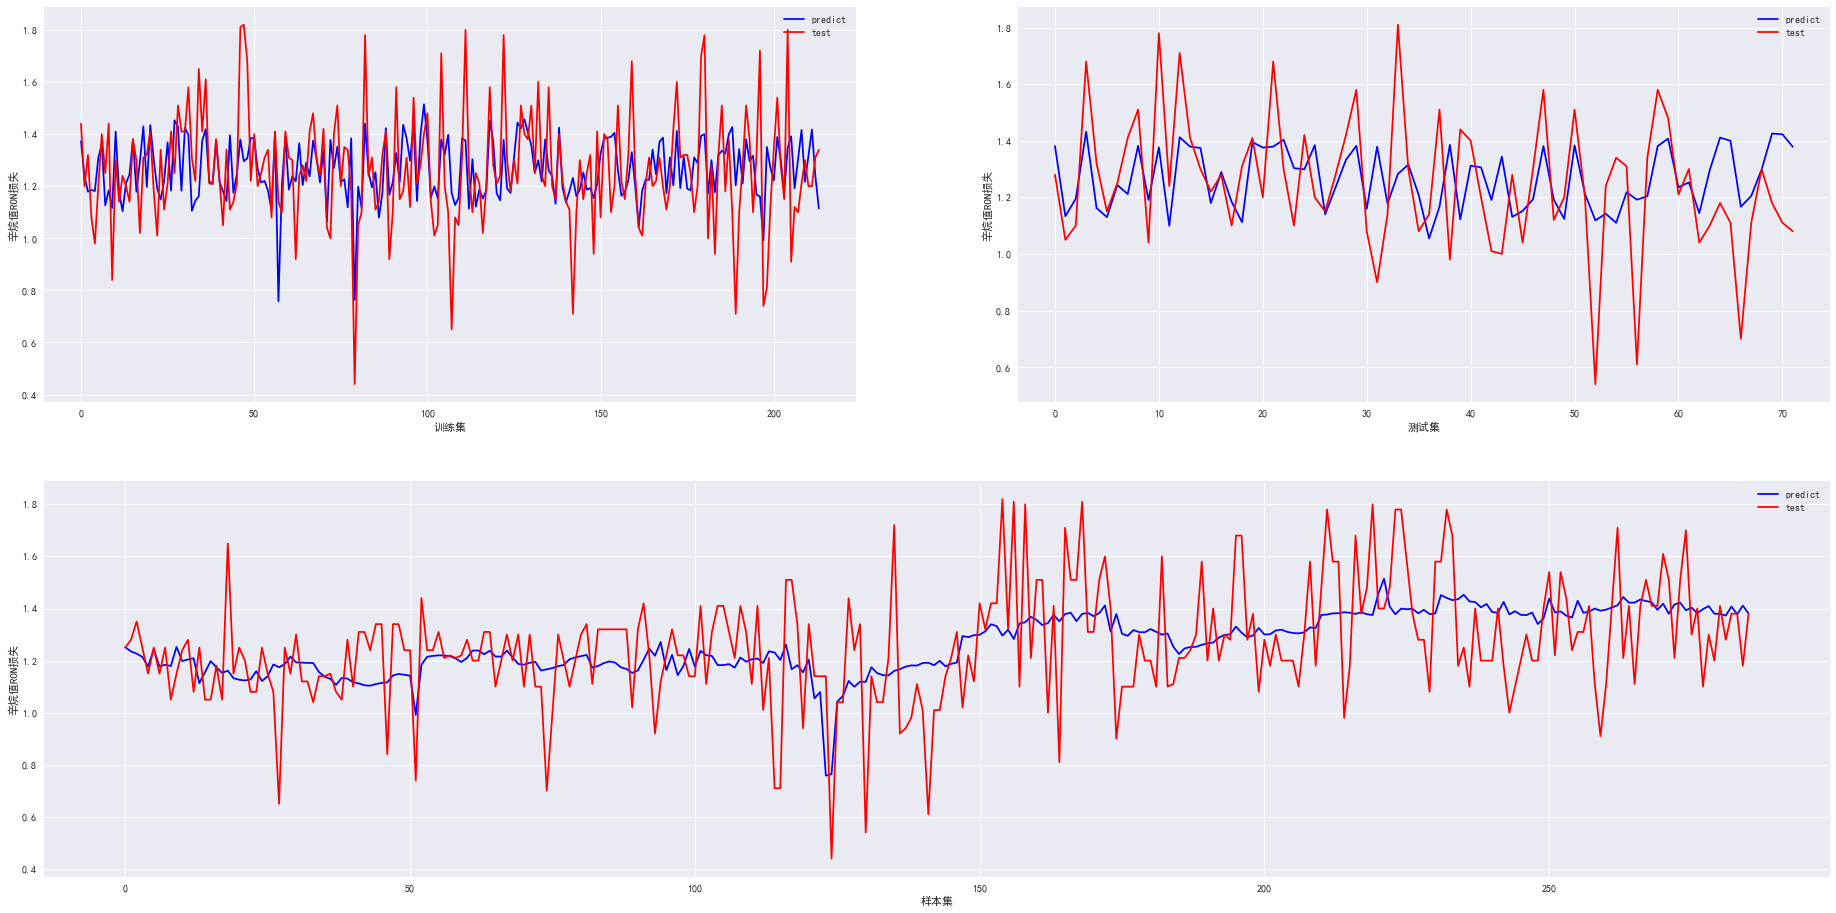

In [18]:
plt.figure(figsize = (32, 16))
plt.subplot(221)
plt.plot(range(len(y_train)), y_train_pred, 'b', label="predict")
plt.plot(range(len(y_train)), y_train, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("训练集")
plt.ylabel("辛烷值RON损失")
plt.subplot(222)
plt.plot(range(len(y_test)), y_test_pred, 'b', label="predict")
plt.plot(range(len(y_test)), y_test, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("测试集")
plt.ylabel("辛烷值RON损失")
plt.subplot(212)
plt.plot(range(len(y)), y_pred, 'b', label="predict")
plt.plot(range(len(y)), y, 'r', label="test")
plt.legend(loc = "upper right")
plt.xlabel("样本集")
plt.ylabel("辛烷值RON损失")
plt.show()